In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sea
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [8]:
data=pd.read_csv('/kaggle/input/titanic/train.csv')
data.info


<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [9]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.drop(['Name'],axis=1,inplace=True)
data.drop(['Cabin'],axis=1,inplace=True)
data.drop(['PassengerId'],axis=1,inplace=True)
data.drop(['Ticket'],axis=1,inplace=True)

KeyError: "['Name'] not found in axis"

In [24]:
data.head()
col={"Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"}

In [26]:
data_num=data.select_dtypes(include=['int64','int32','float64'])
data_cat=data.select_dtypes(object)

In [28]:
data_cat.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


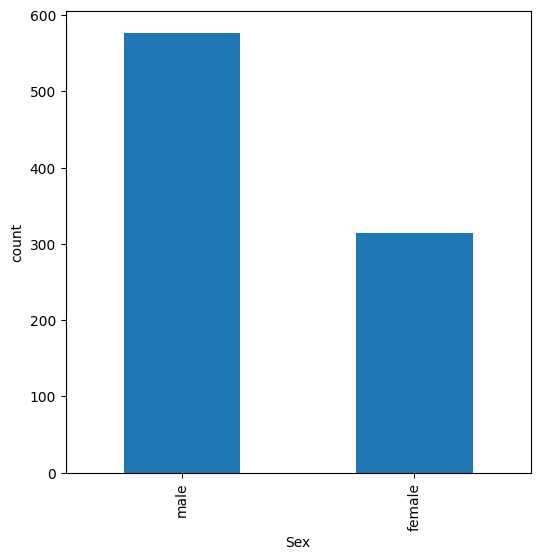

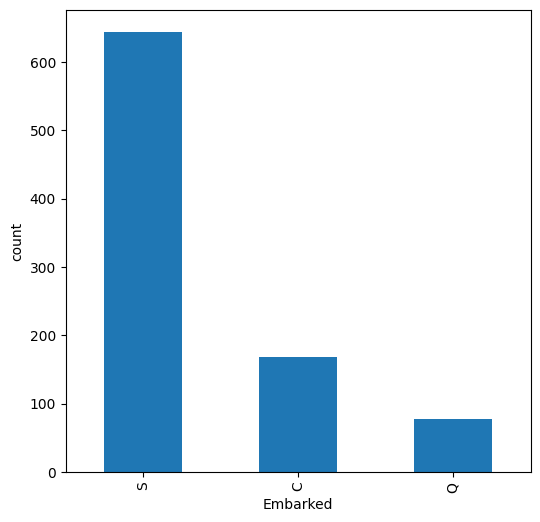

In [31]:
for c in data_cat:
    plt.figure(figsize=(6,6))
    plt.xlabel(c)
    plt.ylabel('count')
    data_cat[c].value_counts().plot(kind = 'bar')
    plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data_cat:
    data_cat[col]=le.fit_transform(data_cat[col])
data_cat.head()

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2


In [37]:
for col in data_cat:
    data_cat[col].fillna(data_cat[col].median(),inplace=True)
    
    

/tmp/ipykernel_34/1815630605.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cat[col].fillna(data_cat[col].median(),inplace=True)


In [39]:
data_cat.head()
for col in data_num:
    data_num[col].fillna(data_num[col].median(),inplace=True)

/tmp/ipykernel_34/3387553582.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_num[col].fillna(data_num[col].median(),inplace=True)
/tmp/ipykernel_34/3387553582.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [50]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data:
    data[col]=le.fit_transform(data[col])
data_cat.head()

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2


In [53]:
data.head()
for col in data:
    data[col].fillna(data[col].median(),inplace=True)

In [63]:
data.head()
y.head()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [66]:
pre=model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pre)

0.8100558659217877

In [79]:
test=pd.read_csv('/kaggle/input/titanic/test.csv')
id=test["PassengerId"]
test.head()
test.drop(['Name'],axis=1,inplace=True)
test.drop(['Cabin'],axis=1,inplace=True)
test.drop(['PassengerId'],axis=1,inplace=True)
test.drop(['Ticket'],axis=1,inplace=True)

In [82]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data:
   test[col]=le.fit_transform(test[col])

submit=pre=model.predict(test)
df=pd.DataFrame({"PASSENGER Id":id.values,"SURVIVED":submit})
df.to_csv("submission.csv",index=False)

In [85]:
df.head()

,PASSENGER Id,SURVIVED
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
